# Plotting the Kernel Density Estimate of M-17 ice accumulation phase

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [2]:
try:
    import simplejson as json
except (ImportError,):
    import json

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.signal as sg

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.gridspec import GridSpec

In [4]:
import scripts.OxcalReader as ox

In [5]:
# define some nice colour palette to use further on.
colors = sns.palettes.color_palette('colorblind',n_colors=10)

In [6]:
M17 = ox.ReadFile('data/age_model/M17_KDE.json')
kde_M17  = M17['ocd'][1]   # the kernel density object
start_M17 = M17['ocd'][6]  # boundary object
end_M17 = M17['ocd'][-1]  # boundary object

In [8]:
buentgen = pd.read_csv("data/proxies/Buentgen_clean.csv")
buentgen.index  = buentgen['Year']

In [42]:
def butterworth(proxy,n):
    fs = 1.0    # sampling frequency (once every year)
    nyq = 0.5 * fs

    c = 1/n   # cut-off 1/60 (60-year low pass)
    b, a = sg.butter(2, c/nyq, btype='low', analog=False)
    # We apply this filter to the signal.
    
    date = buentgen.loc[:,['Year',proxy]].dropna()["Year"].to_numpy()
    yi = buentgen.loc[:,['Year',proxy]].dropna()[proxy].to_numpy()

    # filtering the signal.
    yi_filt = sg.filtfilt(b, a, yi)
    
    return date,yi_filt



In [43]:
butterworth('TempJJA',60)

(array([-499, -498, -497, ..., 2001, 2002, 2003]),
 array([0.56002269, 0.53468295, 0.51040585, ..., 2.16679963, 2.24752374,
        2.32034052]))

In [85]:
def plotBuentgen(ax,option='T'):
    # plot the data for temperature
    if option == 'T':
        date,y = butterworth("TempJJA",60)
        ax.plot(date,y,color =colors[3], zorder = 99)
        ax.plot(date,buentgen.loc[:,['Year',"TempJJA"]].dropna()["TempJJA"].to_numpy(),
                zorder =0, lw = 0.5,color = colors[3], alpha = 0.5)
        
        datemin,ymin = butterworth("TempJJA-",60)
        datemax,ymax = butterworth("TempJJA+",60)

        ax.fill_between(datemin,y1=ymin,y2 = ymax,
                    label = 'Temperature',facecolor=colors[3],alpha = 0.25)
        ax.set_ylabel("JJA temperature\nanomalies [°C]", fontsize= 9, zorder = 50)
        ax.set_ylim(-5, 4)
        ax.axhline(y = 0, ls= '--', color = 'r', lw= 0.5)
        
        
    else:
        date,y = butterworth("PrecipAMJ",60)
        ax.plot(date,y,color = colors[0],zorder=99)
        
        datemin,ymin = butterworth("PrecipAMJ-",60)
        datemax,ymax = butterworth("PrecipAMJ+",60)
    
        ax.fill_between(datemin, y1= ymin, y2= ymax, label= 'Precip',facecolor= colors[0], alpha= 0.25,zorder = 50)
        ax.set_ylabel("AMJ precipitation\ntotals [mm]", fontsize= 9)
        ax.axhline(y = np.mean(y), ls= '--', color = 'r', lw= 0.5)
        ax.plot(date,buentgen.loc[:,['Year',"PrecipAMJ"]].dropna()["PrecipAMJ"].to_numpy(),
                zorder =0, lw = 0.5,color = colors[0], alpha = 0.5)

    
     # axis limits
    ax.set_xlim(-200,2000)
    
    # spine visibility
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

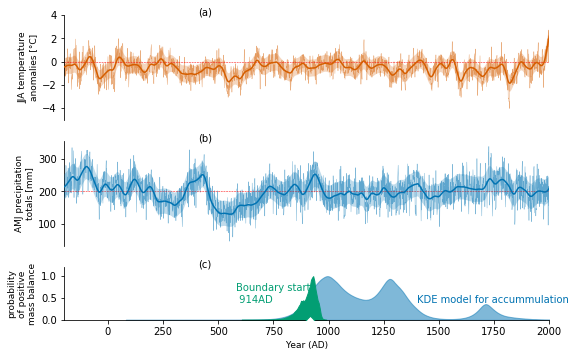

In [86]:
# set up figure environment and canvas size
fig = plt.figure(figsize = (8, 5))

# set up the subfigures height ratios
gs = GridSpec(3, 1, height_ratios=[2, 2, 1])

# Proxy Buentgen Temperature
ax_bue = fig.add_subplot(gs[0])
plotBuentgen(ax_bue, option= 'T')

# Proxy Buentgen Precipitation
ax_bue2 = fig.add_subplot(gs[1])
plotBuentgen(ax_bue2, option= 'Precip')

# KDE plotting
ax1 = fig.add_subplot(gs[2])

# plot KDE model with boundaries
KDE_plot,med = ox.FillBetween(ax1, kde_M17, color= colors[0], **{'alpha':0.5})

ax1.text(1400, 0.4, 'KDE model for accummulation', color= colors[0])

s_plot,s_med = ox.FillBetween(ax1, start_M17, median= True, color= colors[2])

ax1.text(580, 0.4, 'Boundary start\n {:.0f}AD'.format(s_med), color= colors[2])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylim(0, 1.2)
ax1.set_xlim(-200, 2000)
ax1.set_yticks([0, 0.5, 1])
ax1.set_ylabel("probability\nof positive\nmass balance", fontsize= 9)

ax1.set_xlabel("Year (AD)", fontsize= 9)


for ax in (ax_bue,ax_bue2):
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)

for ax,l in zip((ax_bue,ax_bue2,ax1),('a','b','c')):
    ax.text(410,ax.get_ylim()[1],'({})'.format(l),ha='left')
    
plt.tight_layout()
plt.savefig('outputs/age_model.pdf',dpi = 300)
plt.savefig('../reports/M17_manuscript/figures/FIGURE_8.pdf',dpi = 300)
plt.show()

In [ ]:
fig = plt.figure(figsize = (8, 5))

gs = GridSpec(3, 1, height_ratios=[2, 2, 1])

#ax4 = fig.add_subplot(gs[4])
#sum_m17 = ox.FillBetween(ax4, M17['ocd'][4], color= 'grey')
#ax4.text(450, -0.2, 'Sum of modelled PDFs', color='grey')


# plot the simplified PDFs.
#ax3 = fig.add_subplot(gs[5])

#for c,date in enumerate(M17['ocd'][8:-1]): 
    #d = ox.MakeRects(ax3,date,c,facecolor = 'grey')
    #ax3.text(date['posterior']['start']-20,c+0.5,s=date['name'],size = 6,va='center', ha = 'right')
    #ax3.scatter([float(date['posterior']['median'])],[c+0.5],marker ='D',facecolor = 'white',edgecolor='grey',s=10,zorder = 100)

#ax3.text(450,8,"stratigraphic order",size = 8,ha='center',va = 'center')
#ax3.annotate("",(450,15),(450,8.5), arrowprops=dict(arrowstyle="->"))
#ax3.annotate("",(450,7.7),(450,3), arrowprops=dict(arrowstyle="-"))

#ax3.set_xlabel('Calendar year (AD)',**{'size':8})